
# Configuring and Training a Multi-layer Perceptron (MLP) in SciKit-Learn

**(Notebook prepared by Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Université Paris)**


## 1. Understand and experiment MLP on a VERY simple classification problem

Number of training examples =  270

  first  27 training examples
[  Input_features  ]     [Target_output]
[-1.20795808  0.84566164] [1. 0.]
[-0.3679812  -1.86009484] [0. 1.]
[ 1.75068715 -0.02454074] [0. 1.]
[-1.15751112  0.78387986] [1. 0.]
[0.47423414 0.14559574] [1. 0.]
[ 0.57472059 -0.11565898] [1. 0.]
[ 1.59710867 -0.92380694] [0. 1.]
[ 0.67379632 -1.15267848] [0. 1.]
[-0.6673606   1.43159645] [1. 0.]
[-0.87655567  1.42999158] [1. 0.]
[0.12044951 1.47646157] [1. 0.]
[-0.16369487 -0.5134652 ] [0. 1.]
[ 1.17752453 -1.19756654] [0. 1.]
[-2.01223541 -0.62344788] [1. 0.]
[-0.41155718 -0.06050651] [0. 1.]
[ 1.07067284 -1.83345891] [0. 1.]
[-1.61102986  0.24005516] [1. 0.]
[ 0.15772159 -1.32203759] [0. 1.]
[0.23186065 0.85849435] [1. 0.]
[-1.18297529  1.22277959] [1. 0.]
[ 1.1535286 -1.4274883] [0. 1.]
[ 0.93845623 -1.3659069 ] [0. 1.]
[1.63089456 0.64199986] [0. 1.]
[-0.59559671 -0.01281071] [0. 1.]
[-1.49425286  0.31580681] [1. 0.]
[-1.30092383  0.14931768] [1. 0.]
[-1.70814688 -0.603

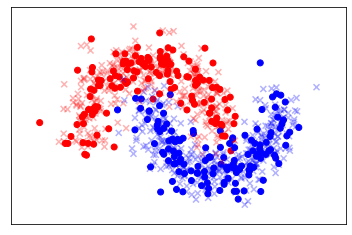

In [1]:
###########################################################################################
# Author: Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Research University
###########################################################################################

%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Create artificial dataset (classification problem within 2 classes within R^2 input space)
Xmoon, y_moon = make_moons(n_samples=900, noise=0.2, random_state=0)

# Preprocess dataset, and split into training and test part
Xmoon = StandardScaler().fit_transform(Xmoon)
Xmoon_train, Xmoon_test, y_moon_train, y_moon_test = train_test_split(Xmoon, y_moon, test_size=0.7)

# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Ymoon_train_OneHot = np.eye(2)[y_moon_train]
Ymoon_test_OneHot = np.eye(2)[y_moon_test]

# Print beginning of training dataset (for verification)
print("Number of training examples = ", y_moon_train.size)
print()
print("  first ", round(y_moon_train.size/10), "training examples" )
print("[  Input_features  ]     [Target_output]")
for i in range( int(round(y_moon_train.size/10) )):
    print( Xmoon_train[i], Ymoon_train_OneHot[i])

# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points...
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
#   ...and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Define limits/scale of plot axis
x_min, x_max = Xmoon[:, 0].min() - .5, Xmoon[:, 0].max() + .5
y_min, y_max = Xmoon[:, 1].min() - .5, Xmoon[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

# Actually render the plot
print()
print("PLOT OF TRAINING EXAMPLES AND TEST DATASET")
print("Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]")

plt.ioff()
plt.show()

In [2]:
np.arange(50)*100 + 10

array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510, 1610, 1710, 1810, 1910, 2010, 2110,
       2210, 2310, 2410, 2510, 2610, 2710, 2810, 2910, 3010, 3110, 3210,
       3310, 3410, 3510, 3610, 3710, 3810, 3910, 4010, 4110, 4210, 4310,
       4410, 4510, 4610, 4710, 4810, 4910])

**Building, training and evaluating a simple Neural Network classifier (Multi Layer Perceptron, MLP)**

The SciKit-learn class for MLP is **MLPClassifier**.
Please first read the [*MLPClassifier documentation*](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifierMLPClassifier); to understand all parameters of the constructor.
You can then begin by running the code block below, in which an initial set of hyper-parameter values has been chosen.
**YOU MAY NEED TO CHANGE AT LEAST THE NUMBER OF HIDDEN NEURONS (and probably other hyper-parameters) IN ORDER TO BE ABLE TO LEARN A CORRECT CLASSIFIER**

MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(10,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.32524374
Iteration 2, loss = 0.94723554
Iteration 3, loss = 0.72045632
Iteration 4, loss = 0.61944375
Iteration 5, loss = 0.58232932
Iteration 6, loss = 0.56398580
Iteration 7, loss = 0.55626053
Iteration 8, loss = 0.55379519
Iteration 9, loss = 0.55014248
Iteration 10, loss = 0.54620405
Iteration 11, loss = 0.54387529
Iteration 12, loss = 0.54013536
Iteration 13, loss = 0.53981555
Iteration 14, loss = 0.53826308
Iteration 15, loss = 0.53520846
Iteration 16, loss = 0.53314398
Iteration 17, loss = 0.53080482
Iteration 18, loss = 0.52856827
Iteration 19, loss = 0.52724091
Iteration 20, loss = 0.52455659
Iteration 21, loss = 0.52373921
Iteration 22, loss = 0.52210661
Iteration 23, loss = 0.52053866
It

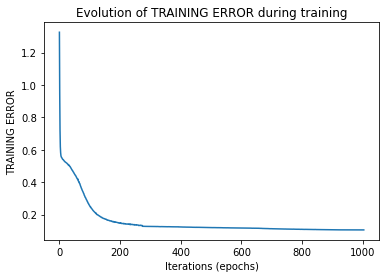

Acuracy (on test set) =  0.9587301587301588
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(110,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.03283178
Iteration 2, loss = 0.69530567
Iteration 3, loss = 0.59656349
Iteration 4, loss = 0.56290501
Iteration 5, loss = 0.54861160
Iteration 6, loss = 0.54145661
Iteration 7, loss = 0.53637435
Iteration 8, loss = 0.53345688
Iteration 9, loss = 0.52793105
Iteration 10, loss = 0.52530295
Iteration 11, loss = 0.52067947
Iteration 12, loss = 0.51672871
Iteration 13, loss = 0.51327230
Iteration 14, loss = 0.51078248
Iteration 15, loss = 0.50658596
Iteration 16, loss = 0.50383116
Iteration 17, loss = 0.50058835
Iteration 18, loss = 0.49627226
Iteration 19, loss = 0.49177668
Iteration 20, loss = 0.48896567
Iteration 21, loss = 0.48457329
Iteration 22, loss = 

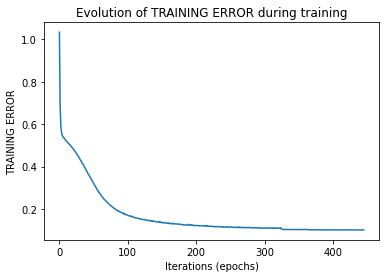

Acuracy (on test set) =  0.9619047619047619
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(210,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 0.99136237
Iteration 2, loss = 0.67497711
Iteration 3, loss = 0.58504749
Iteration 4, loss = 0.55403114
Iteration 5, loss = 0.54145882
Iteration 6, loss = 0.53458563
Iteration 7, loss = 0.52972297
Iteration 8, loss = 0.52456265
Iteration 9, loss = 0.52340905
Iteration 10, loss = 0.51825662
Iteration 11, loss = 0.51471198
Iteration 12, loss = 0.51143356
Iteration 13, loss = 0.50869548
Iteration 14, loss = 0.50513692
Iteration 15, loss = 0.50241329
Iteration 16, loss = 0.49853019
Iteration 17, loss = 0.49748323
Iteration 18, loss = 0.49121535
Iteration 19, loss = 0.48930292
Iteration 20, loss = 0.48406802
Iteration 21, loss = 0.48051318
Iteration 22, loss = 

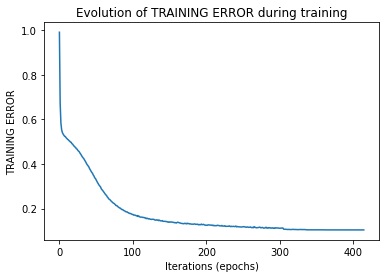

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(310,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06156033
Iteration 2, loss = 0.70103879
Iteration 3, loss = 0.59552728
Iteration 4, loss = 0.55904160
Iteration 5, loss = 0.54410734
Iteration 6, loss = 0.53696650
Iteration 7, loss = 0.53347105
Iteration 8, loss = 0.53079056
Iteration 9, loss = 0.52398705
Iteration 10, loss = 0.52210405
Iteration 11, loss = 0.51842510
Iteration 12, loss = 0.51605511
Iteration 13, loss = 0.51030072
Iteration 14, loss = 0.50790469
Iteration 15, loss = 0.50794765
Iteration 16, loss = 0.50151806
Iteration 17, loss = 0.49725849
Iteration 18, loss = 0.49403360
Iteration 19, loss = 0.49136992
Iteration 20, loss = 0.48744380
Iteration 21, loss = 0.48354813
Iteration 22, loss = 

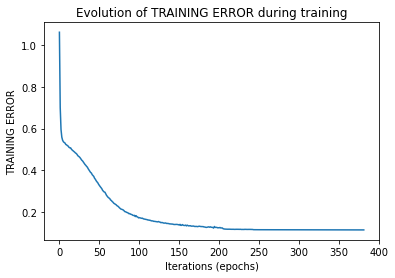

Acuracy (on test set) =  0.9619047619047619
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(410,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06025575
Iteration 2, loss = 0.70347100
Iteration 3, loss = 0.59400301
Iteration 4, loss = 0.55805493
Iteration 5, loss = 0.54236362
Iteration 6, loss = 0.53436816
Iteration 7, loss = 0.52905728
Iteration 8, loss = 0.52442320
Iteration 9, loss = 0.52271849
Iteration 10, loss = 0.51935007
Iteration 11, loss = 0.51583157
Iteration 12, loss = 0.51208668
Iteration 13, loss = 0.50786302
Iteration 14, loss = 0.50561329
Iteration 15, loss = 0.50042420
Iteration 16, loss = 0.49814031
Iteration 17, loss = 0.49481506
Iteration 18, loss = 0.49122760
Iteration 19, loss = 0.48699410
Iteration 20, loss = 0.48515508
Iteration 21, loss = 0.48164968
Iteration 22, loss = 

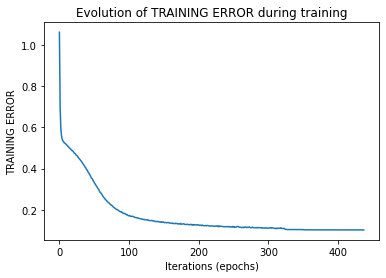

Acuracy (on test set) =  0.9619047619047619
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(510,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.10328768
Iteration 2, loss = 0.72324360
Iteration 3, loss = 0.60287403
Iteration 4, loss = 0.56348486
Iteration 5, loss = 0.54662637
Iteration 6, loss = 0.53751071
Iteration 7, loss = 0.53112549
Iteration 8, loss = 0.52784268
Iteration 9, loss = 0.52204144
Iteration 10, loss = 0.51930868
Iteration 11, loss = 0.51729991
Iteration 12, loss = 0.51426463
Iteration 13, loss = 0.51187523
Iteration 14, loss = 0.50745648
Iteration 15, loss = 0.50297699
Iteration 16, loss = 0.50167763
Iteration 17, loss = 0.49881874
Iteration 18, loss = 0.49412554
Iteration 19, loss = 0.49062637
Iteration 20, loss = 0.48590605
Iteration 21, loss = 0.48202894
Iteration 22, loss = 

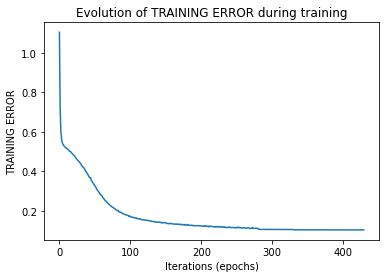

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(610,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06193031
Iteration 2, loss = 0.70339876
Iteration 3, loss = 0.59665783
Iteration 4, loss = 0.55919121
Iteration 5, loss = 0.54476333
Iteration 6, loss = 0.53675037
Iteration 7, loss = 0.52996614
Iteration 8, loss = 0.52668539
Iteration 9, loss = 0.52425106
Iteration 10, loss = 0.51960760
Iteration 11, loss = 0.51731463
Iteration 12, loss = 0.51403183
Iteration 13, loss = 0.51087376
Iteration 14, loss = 0.50604650
Iteration 15, loss = 0.50308017
Iteration 16, loss = 0.49977080
Iteration 17, loss = 0.49755965
Iteration 18, loss = 0.49505244
Iteration 19, loss = 0.49191004
Iteration 20, loss = 0.48615446
Iteration 21, loss = 0.48271615
Iteration 22, loss = 

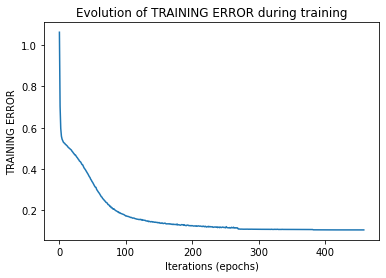

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(710,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.03671480
Iteration 2, loss = 0.69365958
Iteration 3, loss = 0.59445657
Iteration 4, loss = 0.55927711
Iteration 5, loss = 0.54610550
Iteration 6, loss = 0.53772571
Iteration 7, loss = 0.53484683
Iteration 8, loss = 0.53139198
Iteration 9, loss = 0.52728598
Iteration 10, loss = 0.52454477
Iteration 11, loss = 0.51906037
Iteration 12, loss = 0.51635188
Iteration 13, loss = 0.51355104
Iteration 14, loss = 0.50896999
Iteration 15, loss = 0.50725934
Iteration 16, loss = 0.50354153
Iteration 17, loss = 0.49919281
Iteration 18, loss = 0.49681782
Iteration 19, loss = 0.49421967
Iteration 20, loss = 0.48909035
Iteration 21, loss = 0.48399418
Iteration 22, loss = 

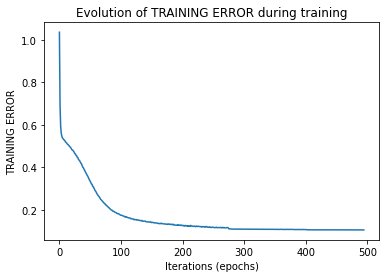

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(810,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.05488724
Iteration 2, loss = 0.69759301
Iteration 3, loss = 0.59465050
Iteration 4, loss = 0.56019030
Iteration 5, loss = 0.54400286
Iteration 6, loss = 0.53581950
Iteration 7, loss = 0.53208202
Iteration 8, loss = 0.52573404
Iteration 9, loss = 0.52435485
Iteration 10, loss = 0.52010581
Iteration 11, loss = 0.51696076
Iteration 12, loss = 0.51376452
Iteration 13, loss = 0.51220856
Iteration 14, loss = 0.50614237
Iteration 15, loss = 0.50437985
Iteration 16, loss = 0.49964239
Iteration 17, loss = 0.49530434
Iteration 18, loss = 0.49043981
Iteration 19, loss = 0.48771352
Iteration 20, loss = 0.48411876
Iteration 21, loss = 0.48045927
Iteration 22, loss = 

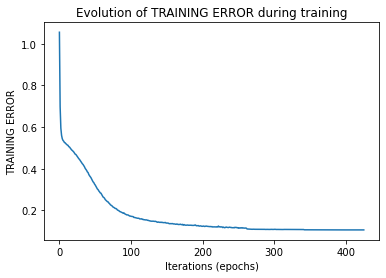

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(910,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.07438062
Iteration 2, loss = 0.70741476
Iteration 3, loss = 0.59711721
Iteration 4, loss = 0.55926499
Iteration 5, loss = 0.54819543
Iteration 6, loss = 0.53706175
Iteration 7, loss = 0.53247760
Iteration 8, loss = 0.52766137
Iteration 9, loss = 0.52329768
Iteration 10, loss = 0.52184001
Iteration 11, loss = 0.51847308
Iteration 12, loss = 0.51480889
Iteration 13, loss = 0.50950843
Iteration 14, loss = 0.50612607
Iteration 15, loss = 0.50477897
Iteration 16, loss = 0.49977791
Iteration 17, loss = 0.49648226
Iteration 18, loss = 0.49489657
Iteration 19, loss = 0.48759041
Iteration 20, loss = 0.48629115
Iteration 21, loss = 0.48015719
Iteration 22, loss = 

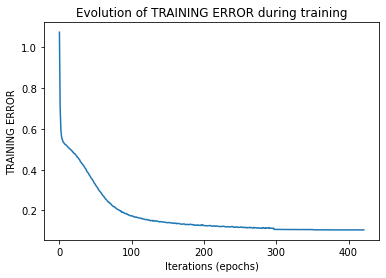

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(1010,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.07291124
Iteration 2, loss = 0.70765252
Iteration 3, loss = 0.59820660
Iteration 4, loss = 0.56125862
Iteration 5, loss = 0.54601619
Iteration 6, loss = 0.53708886
Iteration 7, loss = 0.53287624
Iteration 8, loss = 0.53022398
Iteration 9, loss = 0.52479812
Iteration 10, loss = 0.52286072
Iteration 11, loss = 0.52113685
Iteration 12, loss = 0.51460196
Iteration 13, loss = 0.51175315
Iteration 14, loss = 0.50898709
Iteration 15, loss = 0.50568142
Iteration 16, loss = 0.50230589
Iteration 17, loss = 0.50051006
Iteration 18, loss = 0.49494811
Iteration 19, loss = 0.49299571
Iteration 20, loss = 0.48713817
Iteration 21, loss = 0.48470461
Iteration 22, loss =

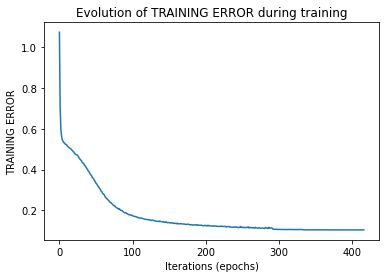

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(1110,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06689950
Iteration 2, loss = 0.70290113
Iteration 3, loss = 0.59502388
Iteration 4, loss = 0.56071061
Iteration 5, loss = 0.54753976
Iteration 6, loss = 0.53756474
Iteration 7, loss = 0.53323159
Iteration 8, loss = 0.53254765
Iteration 9, loss = 0.52539152
Iteration 10, loss = 0.52275328
Iteration 11, loss = 0.51806866
Iteration 12, loss = 0.51511448
Iteration 13, loss = 0.51329215
Iteration 14, loss = 0.50774804
Iteration 15, loss = 0.50425483
Iteration 16, loss = 0.50077922
Iteration 17, loss = 0.49718124
Iteration 18, loss = 0.49356581
Iteration 19, loss = 0.49070902
Iteration 20, loss = 0.48747238
Iteration 21, loss = 0.48376018
Iteration 22, loss =

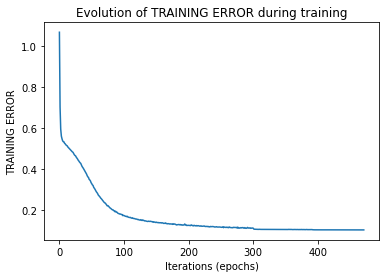

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(1210,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.07254633
Iteration 2, loss = 0.70189020
Iteration 3, loss = 0.59477205
Iteration 4, loss = 0.55841157
Iteration 5, loss = 0.54409039
Iteration 6, loss = 0.53562043
Iteration 7, loss = 0.53115732
Iteration 8, loss = 0.52615434
Iteration 9, loss = 0.52187436
Iteration 10, loss = 0.51930324
Iteration 11, loss = 0.51555243
Iteration 12, loss = 0.51373308
Iteration 13, loss = 0.51086750
Iteration 14, loss = 0.50630023
Iteration 15, loss = 0.50265863
Iteration 16, loss = 0.49929070
Iteration 17, loss = 0.49617346
Iteration 18, loss = 0.49108263
Iteration 19, loss = 0.48925622
Iteration 20, loss = 0.48612150
Iteration 21, loss = 0.48134499
Iteration 22, loss =

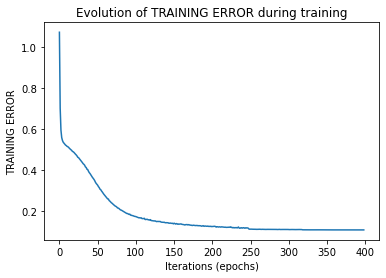

Acuracy (on test set) =  0.9619047619047619
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(1310,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06917004
Iteration 2, loss = 0.70753461
Iteration 3, loss = 0.60364492
Iteration 4, loss = 0.56286042
Iteration 5, loss = 0.54747574
Iteration 6, loss = 0.53884330
Iteration 7, loss = 0.53249524
Iteration 8, loss = 0.52669100
Iteration 9, loss = 0.52273755
Iteration 10, loss = 0.51996435
Iteration 11, loss = 0.51635149
Iteration 12, loss = 0.51595075
Iteration 13, loss = 0.50907163
Iteration 14, loss = 0.50544122
Iteration 15, loss = 0.50429775
Iteration 16, loss = 0.49900096
Iteration 17, loss = 0.49519355
Iteration 18, loss = 0.49294699
Iteration 19, loss = 0.48972808
Iteration 20, loss = 0.48464173
Iteration 21, loss = 0.47946832
Iteration 22, loss =

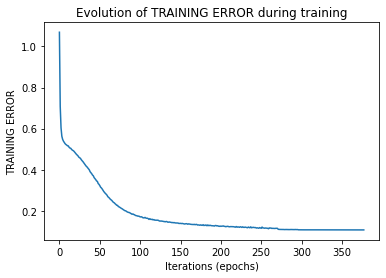

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(1410,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.05601260
Iteration 2, loss = 0.70017580
Iteration 3, loss = 0.59747930
Iteration 4, loss = 0.56150458
Iteration 5, loss = 0.54603170
Iteration 6, loss = 0.53875814
Iteration 7, loss = 0.53354167
Iteration 8, loss = 0.52934329
Iteration 9, loss = 0.52683209
Iteration 10, loss = 0.52166786
Iteration 11, loss = 0.51949158
Iteration 12, loss = 0.51628715
Iteration 13, loss = 0.51378445
Iteration 14, loss = 0.50912574
Iteration 15, loss = 0.50698398
Iteration 16, loss = 0.50414130
Iteration 17, loss = 0.49963113
Iteration 18, loss = 0.49556242
Iteration 19, loss = 0.49162089
Iteration 20, loss = 0.48834160
Iteration 21, loss = 0.48544006
Iteration 22, loss =

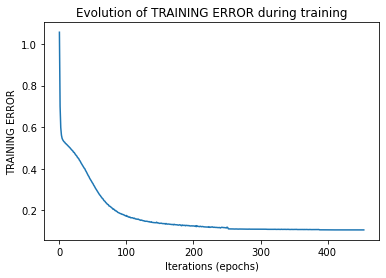

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(1510,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06834018
Iteration 2, loss = 0.70515916
Iteration 3, loss = 0.59770629
Iteration 4, loss = 0.56184586
Iteration 5, loss = 0.54692642
Iteration 6, loss = 0.53720224
Iteration 7, loss = 0.53245668
Iteration 8, loss = 0.52757419
Iteration 9, loss = 0.52405927
Iteration 10, loss = 0.52125557
Iteration 11, loss = 0.51816565
Iteration 12, loss = 0.51430136
Iteration 13, loss = 0.50973281
Iteration 14, loss = 0.50862176
Iteration 15, loss = 0.50479868
Iteration 16, loss = 0.50201138
Iteration 17, loss = 0.49525785
Iteration 18, loss = 0.49272648
Iteration 19, loss = 0.48996417
Iteration 20, loss = 0.48675186
Iteration 21, loss = 0.48393045
Iteration 22, loss =

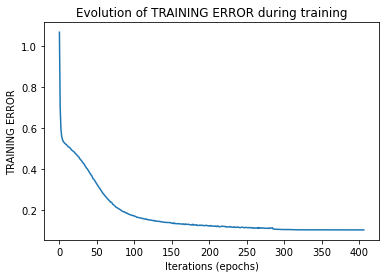

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(1610,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.08012526
Iteration 2, loss = 0.70638199
Iteration 3, loss = 0.59499096
Iteration 4, loss = 0.55863630
Iteration 5, loss = 0.54472145
Iteration 6, loss = 0.53949763
Iteration 7, loss = 0.53280684
Iteration 8, loss = 0.52754542
Iteration 9, loss = 0.52589993
Iteration 10, loss = 0.52030832
Iteration 11, loss = 0.51836886
Iteration 12, loss = 0.51568277
Iteration 13, loss = 0.51186072
Iteration 14, loss = 0.50650355
Iteration 15, loss = 0.50585773
Iteration 16, loss = 0.49909738
Iteration 17, loss = 0.49690015
Iteration 18, loss = 0.49374748
Iteration 19, loss = 0.48815365
Iteration 20, loss = 0.48430801
Iteration 21, loss = 0.48063301
Iteration 22, loss =

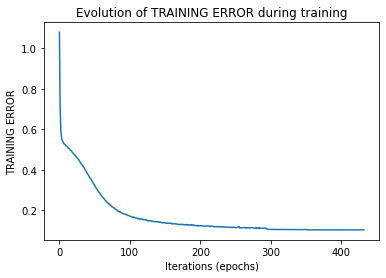

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(1710,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.05485635
Iteration 2, loss = 0.69703149
Iteration 3, loss = 0.59234008
Iteration 4, loss = 0.55984335
Iteration 5, loss = 0.54468887
Iteration 6, loss = 0.53733681
Iteration 7, loss = 0.53342981
Iteration 8, loss = 0.52920131
Iteration 9, loss = 0.52493188
Iteration 10, loss = 0.52086854
Iteration 11, loss = 0.51851451
Iteration 12, loss = 0.51621297
Iteration 13, loss = 0.51270447
Iteration 14, loss = 0.50759102
Iteration 15, loss = 0.50624015
Iteration 16, loss = 0.50251817
Iteration 17, loss = 0.49824960
Iteration 18, loss = 0.49346140
Iteration 19, loss = 0.49244624
Iteration 20, loss = 0.48762911
Iteration 21, loss = 0.48297376
Iteration 22, loss =

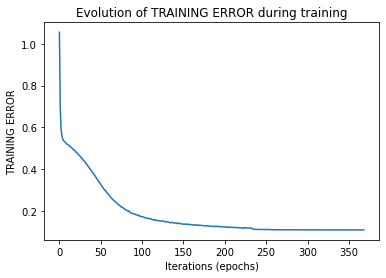

Acuracy (on test set) =  0.9619047619047619
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(1810,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06520158
Iteration 2, loss = 0.70552335
Iteration 3, loss = 0.59678851
Iteration 4, loss = 0.56033308
Iteration 5, loss = 0.54511982
Iteration 6, loss = 0.53691280
Iteration 7, loss = 0.53192137
Iteration 8, loss = 0.52633443
Iteration 9, loss = 0.52398934
Iteration 10, loss = 0.51831561
Iteration 11, loss = 0.51717715
Iteration 12, loss = 0.51391902
Iteration 13, loss = 0.50938889
Iteration 14, loss = 0.50552470
Iteration 15, loss = 0.50300479
Iteration 16, loss = 0.49748537
Iteration 17, loss = 0.49500768
Iteration 18, loss = 0.49332063
Iteration 19, loss = 0.48795324
Iteration 20, loss = 0.48305863
Iteration 21, loss = 0.47920847
Iteration 22, loss =

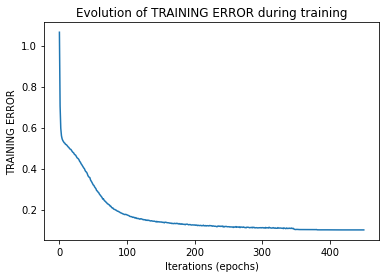

Acuracy (on test set) =  0.9619047619047619
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(1910,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.08130789
Iteration 2, loss = 0.71004824
Iteration 3, loss = 0.59814007
Iteration 4, loss = 0.56324244
Iteration 5, loss = 0.54741896
Iteration 6, loss = 0.53883918
Iteration 7, loss = 0.53363275
Iteration 8, loss = 0.52861218
Iteration 9, loss = 0.52346186
Iteration 10, loss = 0.52141290
Iteration 11, loss = 0.51779496
Iteration 12, loss = 0.51425373
Iteration 13, loss = 0.50916550
Iteration 14, loss = 0.51044780
Iteration 15, loss = 0.50451762
Iteration 16, loss = 0.50058625
Iteration 17, loss = 0.49677169
Iteration 18, loss = 0.49228158
Iteration 19, loss = 0.48873326
Iteration 20, loss = 0.48319146
Iteration 21, loss = 0.48269159
Iteration 22, loss =

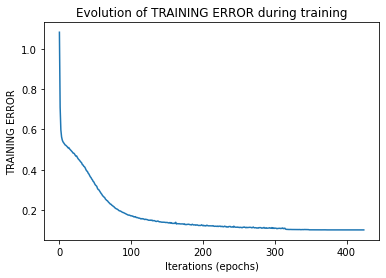

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(2010,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06176458
Iteration 2, loss = 0.70349851
Iteration 3, loss = 0.59551465
Iteration 4, loss = 0.56039185
Iteration 5, loss = 0.54562716
Iteration 6, loss = 0.53893312
Iteration 7, loss = 0.53189876
Iteration 8, loss = 0.52775955
Iteration 9, loss = 0.52461270
Iteration 10, loss = 0.51967700
Iteration 11, loss = 0.51816527
Iteration 12, loss = 0.51396110
Iteration 13, loss = 0.51314882
Iteration 14, loss = 0.50793481
Iteration 15, loss = 0.50423970
Iteration 16, loss = 0.49986802
Iteration 17, loss = 0.49742042
Iteration 18, loss = 0.49187674
Iteration 19, loss = 0.48957560
Iteration 20, loss = 0.48527191
Iteration 21, loss = 0.48225007
Iteration 22, loss =

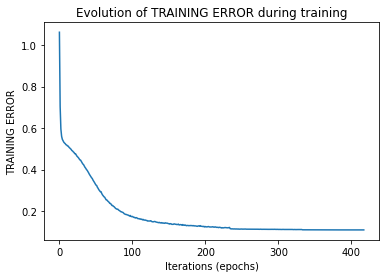

Acuracy (on test set) =  0.9619047619047619
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(2110,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.05587976
Iteration 2, loss = 0.69852790
Iteration 3, loss = 0.59517238
Iteration 4, loss = 0.56018249
Iteration 5, loss = 0.54465555
Iteration 6, loss = 0.53653552
Iteration 7, loss = 0.53342408
Iteration 8, loss = 0.52940196
Iteration 9, loss = 0.52395876
Iteration 10, loss = 0.52167047
Iteration 11, loss = 0.51922729
Iteration 12, loss = 0.51441830
Iteration 13, loss = 0.51264836
Iteration 14, loss = 0.50909752
Iteration 15, loss = 0.50729034
Iteration 16, loss = 0.50227836
Iteration 17, loss = 0.49786914
Iteration 18, loss = 0.49472394
Iteration 19, loss = 0.49138078
Iteration 20, loss = 0.48749351
Iteration 21, loss = 0.48413067
Iteration 22, loss =

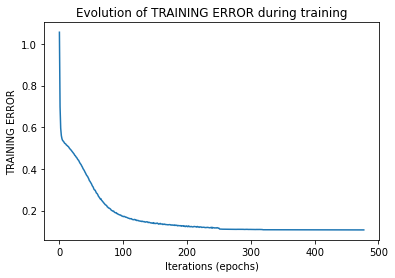

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(2210,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.07146169
Iteration 2, loss = 0.70473238
Iteration 3, loss = 0.59810408
Iteration 4, loss = 0.56153641
Iteration 5, loss = 0.54604321
Iteration 6, loss = 0.53812802
Iteration 7, loss = 0.53293408
Iteration 8, loss = 0.52993251
Iteration 9, loss = 0.52324870
Iteration 10, loss = 0.52099104
Iteration 11, loss = 0.51657486
Iteration 12, loss = 0.51469837
Iteration 13, loss = 0.51090240
Iteration 14, loss = 0.51002084
Iteration 15, loss = 0.50261059
Iteration 16, loss = 0.49942021
Iteration 17, loss = 0.49678834
Iteration 18, loss = 0.49441941
Iteration 19, loss = 0.49029209
Iteration 20, loss = 0.48653579
Iteration 21, loss = 0.48175636
Iteration 22, loss =

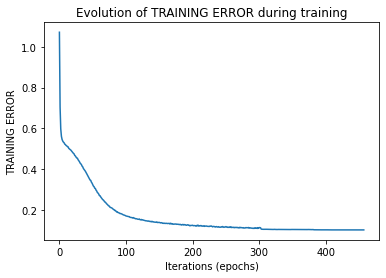

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(2310,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.04616607
Iteration 2, loss = 0.69403415
Iteration 3, loss = 0.59205239
Iteration 4, loss = 0.55982449
Iteration 5, loss = 0.54312757
Iteration 6, loss = 0.53807340
Iteration 7, loss = 0.53063800
Iteration 8, loss = 0.52542833
Iteration 9, loss = 0.52196710
Iteration 10, loss = 0.51864908
Iteration 11, loss = 0.51565712
Iteration 12, loss = 0.51256060
Iteration 13, loss = 0.50836513
Iteration 14, loss = 0.50663095
Iteration 15, loss = 0.50067478
Iteration 16, loss = 0.49804704
Iteration 17, loss = 0.49747351
Iteration 18, loss = 0.49082198
Iteration 19, loss = 0.48925857
Iteration 20, loss = 0.48268018
Iteration 21, loss = 0.48067332
Iteration 22, loss =

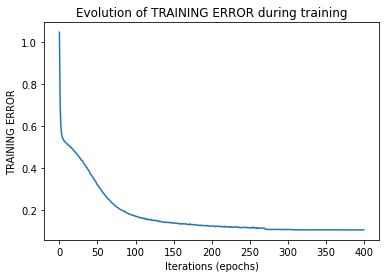

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(2410,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.08053825
Iteration 2, loss = 0.70891843
Iteration 3, loss = 0.59628914
Iteration 4, loss = 0.55948832
Iteration 5, loss = 0.54579468
Iteration 6, loss = 0.53523385
Iteration 7, loss = 0.52998504
Iteration 8, loss = 0.52655565
Iteration 9, loss = 0.52251406
Iteration 10, loss = 0.52042066
Iteration 11, loss = 0.51664738
Iteration 12, loss = 0.51147993
Iteration 13, loss = 0.50943593
Iteration 14, loss = 0.50650686
Iteration 15, loss = 0.50126013
Iteration 16, loss = 0.49942252
Iteration 17, loss = 0.49366968
Iteration 18, loss = 0.49141704
Iteration 19, loss = 0.48718632
Iteration 20, loss = 0.48249198
Iteration 21, loss = 0.47986948
Iteration 22, loss =

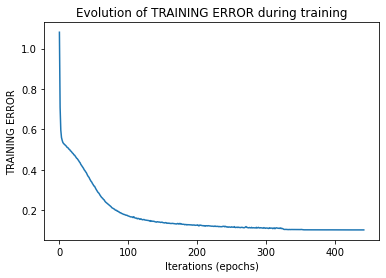

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(2510,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.05749322
Iteration 2, loss = 0.69547241
Iteration 3, loss = 0.59469275
Iteration 4, loss = 0.55861117
Iteration 5, loss = 0.54494265
Iteration 6, loss = 0.53697421
Iteration 7, loss = 0.53133152
Iteration 8, loss = 0.52565614
Iteration 9, loss = 0.52243904
Iteration 10, loss = 0.51983778
Iteration 11, loss = 0.51605548
Iteration 12, loss = 0.51254766
Iteration 13, loss = 0.50773909
Iteration 14, loss = 0.50542902
Iteration 15, loss = 0.50189355
Iteration 16, loss = 0.49659061
Iteration 17, loss = 0.49460098
Iteration 18, loss = 0.49232069
Iteration 19, loss = 0.48870783
Iteration 20, loss = 0.48188129
Iteration 21, loss = 0.48128978
Iteration 22, loss =

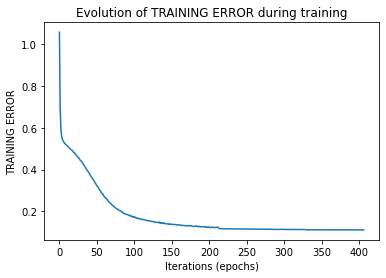

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(2610,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06118408
Iteration 2, loss = 0.70081514
Iteration 3, loss = 0.59660311
Iteration 4, loss = 0.56194668
Iteration 5, loss = 0.54524590
Iteration 6, loss = 0.53669362
Iteration 7, loss = 0.53158062
Iteration 8, loss = 0.53014046
Iteration 9, loss = 0.52495960
Iteration 10, loss = 0.52021914
Iteration 11, loss = 0.51777383
Iteration 12, loss = 0.51469835
Iteration 13, loss = 0.51340427
Iteration 14, loss = 0.50799685
Iteration 15, loss = 0.50413299
Iteration 16, loss = 0.50122633
Iteration 17, loss = 0.49604732
Iteration 18, loss = 0.49314980
Iteration 19, loss = 0.49008346
Iteration 20, loss = 0.48805488
Iteration 21, loss = 0.48381939
Iteration 22, loss =

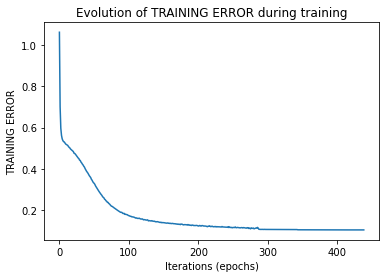

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(2710,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06047360
Iteration 2, loss = 0.70359106
Iteration 3, loss = 0.59684011
Iteration 4, loss = 0.56105258
Iteration 5, loss = 0.54543357
Iteration 6, loss = 0.53844683
Iteration 7, loss = 0.53158929
Iteration 8, loss = 0.52856685
Iteration 9, loss = 0.52449088
Iteration 10, loss = 0.52055971
Iteration 11, loss = 0.51871911
Iteration 12, loss = 0.51296074
Iteration 13, loss = 0.51010632
Iteration 14, loss = 0.50786283
Iteration 15, loss = 0.50297614
Iteration 16, loss = 0.50118698
Iteration 17, loss = 0.49713850
Iteration 18, loss = 0.49278960
Iteration 19, loss = 0.48929030
Iteration 20, loss = 0.48493628
Iteration 21, loss = 0.48094365
Iteration 22, loss =

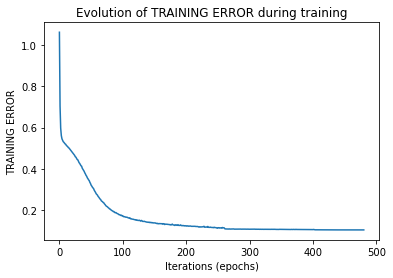

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(2810,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.07064360
Iteration 2, loss = 0.70211675
Iteration 3, loss = 0.59669296
Iteration 4, loss = 0.56165991
Iteration 5, loss = 0.54731399
Iteration 6, loss = 0.53811838
Iteration 7, loss = 0.53123607
Iteration 8, loss = 0.52725046
Iteration 9, loss = 0.52479250
Iteration 10, loss = 0.52047963
Iteration 11, loss = 0.51831215
Iteration 12, loss = 0.51674401
Iteration 13, loss = 0.50981989
Iteration 14, loss = 0.50704047
Iteration 15, loss = 0.50310755
Iteration 16, loss = 0.50129444
Iteration 17, loss = 0.49859678
Iteration 18, loss = 0.49351396
Iteration 19, loss = 0.49164557
Iteration 20, loss = 0.48580787
Iteration 21, loss = 0.48112164
Iteration 22, loss =

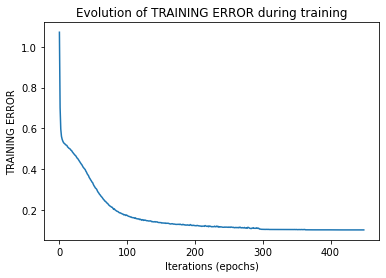

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(2910,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06873661
Iteration 2, loss = 0.70449242
Iteration 3, loss = 0.59667276
Iteration 4, loss = 0.56001392
Iteration 5, loss = 0.54542359
Iteration 6, loss = 0.53772683
Iteration 7, loss = 0.53214390
Iteration 8, loss = 0.52896967
Iteration 9, loss = 0.52400565
Iteration 10, loss = 0.51958590
Iteration 11, loss = 0.51761296
Iteration 12, loss = 0.51578265
Iteration 13, loss = 0.50932070
Iteration 14, loss = 0.50699353
Iteration 15, loss = 0.50401023
Iteration 16, loss = 0.49806937
Iteration 17, loss = 0.49858017
Iteration 18, loss = 0.49242561
Iteration 19, loss = 0.48995200
Iteration 20, loss = 0.48547312
Iteration 21, loss = 0.48167955
Iteration 22, loss =

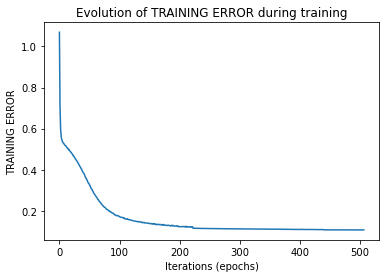

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(3010,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06721702
Iteration 2, loss = 0.70516468
Iteration 3, loss = 0.59847083
Iteration 4, loss = 0.56359865
Iteration 5, loss = 0.54574567
Iteration 6, loss = 0.53776167
Iteration 7, loss = 0.53137958
Iteration 8, loss = 0.52749243
Iteration 9, loss = 0.52327317
Iteration 10, loss = 0.52100815
Iteration 11, loss = 0.51877022
Iteration 12, loss = 0.51441441
Iteration 13, loss = 0.51262619
Iteration 14, loss = 0.50751391
Iteration 15, loss = 0.50331374
Iteration 16, loss = 0.50106786
Iteration 17, loss = 0.49670824
Iteration 18, loss = 0.49304597
Iteration 19, loss = 0.49026333
Iteration 20, loss = 0.48397967
Iteration 21, loss = 0.48301554
Iteration 22, loss =

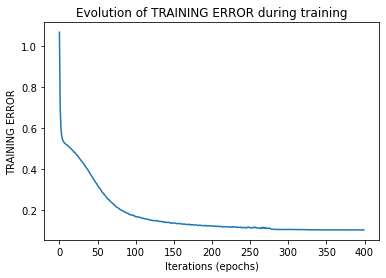

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(3110,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.07666019
Iteration 2, loss = 0.71549224
Iteration 3, loss = 0.60023217
Iteration 4, loss = 0.56086499
Iteration 5, loss = 0.54547179
Iteration 6, loss = 0.53673381
Iteration 7, loss = 0.53140435
Iteration 8, loss = 0.52744283
Iteration 9, loss = 0.52386195
Iteration 10, loss = 0.52079363
Iteration 11, loss = 0.51723318
Iteration 12, loss = 0.51333734
Iteration 13, loss = 0.50828689
Iteration 14, loss = 0.50536836
Iteration 15, loss = 0.50399475
Iteration 16, loss = 0.49915532
Iteration 17, loss = 0.49386283
Iteration 18, loss = 0.49188539
Iteration 19, loss = 0.48808218
Iteration 20, loss = 0.48453399
Iteration 21, loss = 0.47773780
Iteration 22, loss =

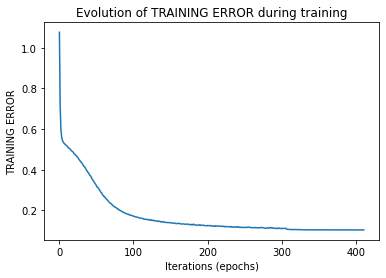

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(3210,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06933951
Iteration 2, loss = 0.70788740
Iteration 3, loss = 0.59795201
Iteration 4, loss = 0.55980486
Iteration 5, loss = 0.54500881
Iteration 6, loss = 0.53948019
Iteration 7, loss = 0.53578113
Iteration 8, loss = 0.52911426
Iteration 9, loss = 0.52448640
Iteration 10, loss = 0.51987189
Iteration 11, loss = 0.51661304
Iteration 12, loss = 0.51420927
Iteration 13, loss = 0.50904782
Iteration 14, loss = 0.50526972
Iteration 15, loss = 0.50322693
Iteration 16, loss = 0.49810512
Iteration 17, loss = 0.49611522
Iteration 18, loss = 0.49228482
Iteration 19, loss = 0.48750365
Iteration 20, loss = 0.48603772
Iteration 21, loss = 0.48089132
Iteration 22, loss =

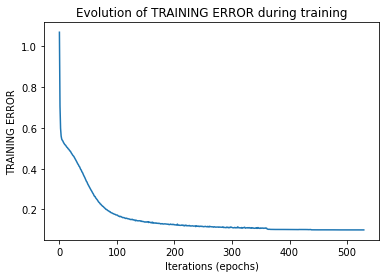

Acuracy (on test set) =  0.9619047619047619
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(3310,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06568874
Iteration 2, loss = 0.70347500
Iteration 3, loss = 0.59517521
Iteration 4, loss = 0.55971866
Iteration 5, loss = 0.54393723
Iteration 6, loss = 0.53822938
Iteration 7, loss = 0.53267567
Iteration 8, loss = 0.52783489
Iteration 9, loss = 0.52399351
Iteration 10, loss = 0.52181738
Iteration 11, loss = 0.51939419
Iteration 12, loss = 0.51392340
Iteration 13, loss = 0.51209455
Iteration 14, loss = 0.50820577
Iteration 15, loss = 0.50371214
Iteration 16, loss = 0.50120887
Iteration 17, loss = 0.49779744
Iteration 18, loss = 0.49391830
Iteration 19, loss = 0.49164216
Iteration 20, loss = 0.48661420
Iteration 21, loss = 0.48297680
Iteration 22, loss =

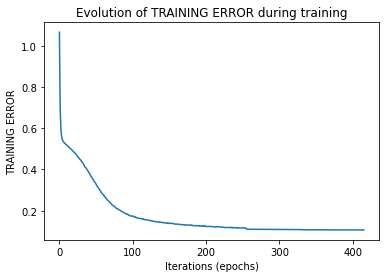

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(3410,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.05824934
Iteration 2, loss = 0.70015640
Iteration 3, loss = 0.59528702
Iteration 4, loss = 0.56121198
Iteration 5, loss = 0.54597824
Iteration 6, loss = 0.53709908
Iteration 7, loss = 0.53136730
Iteration 8, loss = 0.52955543
Iteration 9, loss = 0.52602854
Iteration 10, loss = 0.52007354
Iteration 11, loss = 0.51790521
Iteration 12, loss = 0.51328007
Iteration 13, loss = 0.51063735
Iteration 14, loss = 0.50711511
Iteration 15, loss = 0.50395482
Iteration 16, loss = 0.49995504
Iteration 17, loss = 0.49639742
Iteration 18, loss = 0.49306277
Iteration 19, loss = 0.48993806
Iteration 20, loss = 0.48651589
Iteration 21, loss = 0.48208074
Iteration 22, loss =

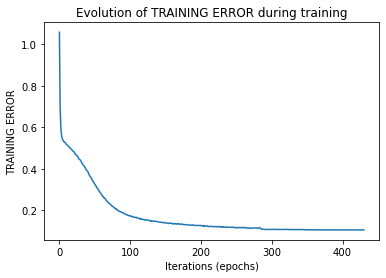

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(3510,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.07040393
Iteration 2, loss = 0.70230260
Iteration 3, loss = 0.59251393
Iteration 4, loss = 0.55919790
Iteration 5, loss = 0.54412974
Iteration 6, loss = 0.53619618
Iteration 7, loss = 0.53178169
Iteration 8, loss = 0.52659464
Iteration 9, loss = 0.52364238
Iteration 10, loss = 0.52014629
Iteration 11, loss = 0.51561852
Iteration 12, loss = 0.51568939
Iteration 13, loss = 0.51164651
Iteration 14, loss = 0.50618957
Iteration 15, loss = 0.50177071
Iteration 16, loss = 0.49755133
Iteration 17, loss = 0.49594147
Iteration 18, loss = 0.49010732
Iteration 19, loss = 0.48601940
Iteration 20, loss = 0.48240673
Iteration 21, loss = 0.47927404
Iteration 22, loss =

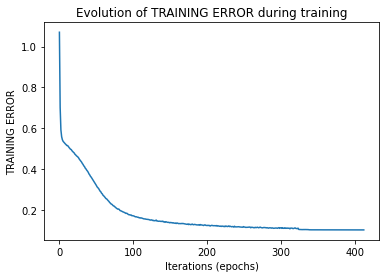

Acuracy (on test set) =  0.9619047619047619
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(3610,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.05463172
Iteration 2, loss = 0.69870717
Iteration 3, loss = 0.59421567
Iteration 4, loss = 0.55848480
Iteration 5, loss = 0.54487720
Iteration 6, loss = 0.53620513
Iteration 7, loss = 0.53079157
Iteration 8, loss = 0.52730235
Iteration 9, loss = 0.52433831
Iteration 10, loss = 0.51991494
Iteration 11, loss = 0.51725425
Iteration 12, loss = 0.51291730
Iteration 13, loss = 0.51049052
Iteration 14, loss = 0.50730144
Iteration 15, loss = 0.50251909
Iteration 16, loss = 0.49989939
Iteration 17, loss = 0.49621805
Iteration 18, loss = 0.49340469
Iteration 19, loss = 0.48777997
Iteration 20, loss = 0.48453423
Iteration 21, loss = 0.48059439
Iteration 22, loss =

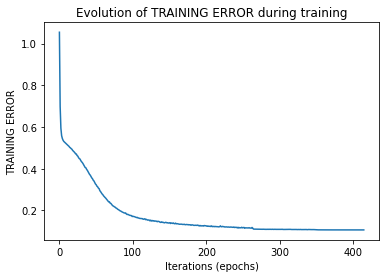

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(3710,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06768942
Iteration 2, loss = 0.70050336
Iteration 3, loss = 0.59431633
Iteration 4, loss = 0.55999568
Iteration 5, loss = 0.54659433
Iteration 6, loss = 0.53834400
Iteration 7, loss = 0.53108381
Iteration 8, loss = 0.52836521
Iteration 9, loss = 0.52328643
Iteration 10, loss = 0.52106645
Iteration 11, loss = 0.51823077
Iteration 12, loss = 0.51284494
Iteration 13, loss = 0.51071472
Iteration 14, loss = 0.50533762
Iteration 15, loss = 0.50623775
Iteration 16, loss = 0.50004888
Iteration 17, loss = 0.49674438
Iteration 18, loss = 0.49385480
Iteration 19, loss = 0.48687415
Iteration 20, loss = 0.48603553
Iteration 21, loss = 0.48186374
Iteration 22, loss =

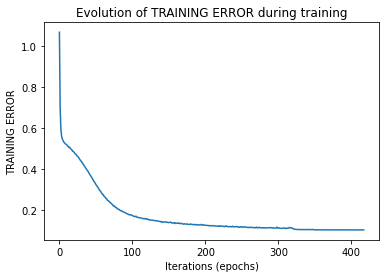

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(3810,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.05343213
Iteration 2, loss = 0.69765907
Iteration 3, loss = 0.59552198
Iteration 4, loss = 0.56071646
Iteration 5, loss = 0.54771420
Iteration 6, loss = 0.53806327
Iteration 7, loss = 0.53178016
Iteration 8, loss = 0.52744206
Iteration 9, loss = 0.52542883
Iteration 10, loss = 0.52002415
Iteration 11, loss = 0.51739002
Iteration 12, loss = 0.51538417
Iteration 13, loss = 0.51053948
Iteration 14, loss = 0.50934178
Iteration 15, loss = 0.50557244
Iteration 16, loss = 0.50043240
Iteration 17, loss = 0.49902782
Iteration 18, loss = 0.49534898
Iteration 19, loss = 0.49022460
Iteration 20, loss = 0.48650438
Iteration 21, loss = 0.48251315
Iteration 22, loss =

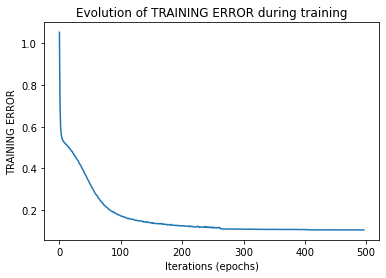

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(3910,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06625593
Iteration 2, loss = 0.70338691
Iteration 3, loss = 0.59691395
Iteration 4, loss = 0.56069936
Iteration 5, loss = 0.54564896
Iteration 6, loss = 0.53669167
Iteration 7, loss = 0.53326903
Iteration 8, loss = 0.52899753
Iteration 9, loss = 0.52394944
Iteration 10, loss = 0.51988728
Iteration 11, loss = 0.51874703
Iteration 12, loss = 0.51651012
Iteration 13, loss = 0.51155089
Iteration 14, loss = 0.50831457
Iteration 15, loss = 0.50625662
Iteration 16, loss = 0.50321488
Iteration 17, loss = 0.49935504
Iteration 18, loss = 0.49504105
Iteration 19, loss = 0.49135191
Iteration 20, loss = 0.48864787
Iteration 21, loss = 0.48233289
Iteration 22, loss =

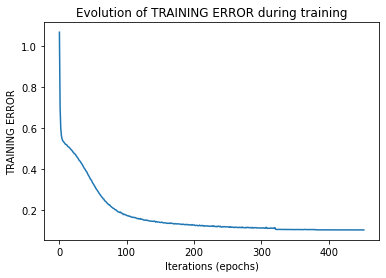

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(4010,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06565139
Iteration 2, loss = 0.70165413
Iteration 3, loss = 0.59399403
Iteration 4, loss = 0.55944438
Iteration 5, loss = 0.54497413
Iteration 6, loss = 0.53750102
Iteration 7, loss = 0.53286814
Iteration 8, loss = 0.52746950
Iteration 9, loss = 0.52368748
Iteration 10, loss = 0.52021070
Iteration 11, loss = 0.51705381
Iteration 12, loss = 0.51319443
Iteration 13, loss = 0.51004250
Iteration 14, loss = 0.50619610
Iteration 15, loss = 0.50399377
Iteration 16, loss = 0.49954027
Iteration 17, loss = 0.49858635
Iteration 18, loss = 0.49231802
Iteration 19, loss = 0.48874231
Iteration 20, loss = 0.48463570
Iteration 21, loss = 0.47986975
Iteration 22, loss =

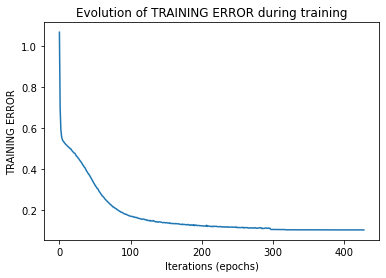

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(4110,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06687705
Iteration 2, loss = 0.70512428
Iteration 3, loss = 0.59873639
Iteration 4, loss = 0.55990371
Iteration 5, loss = 0.54617283
Iteration 6, loss = 0.53646189
Iteration 7, loss = 0.53291005
Iteration 8, loss = 0.52743899
Iteration 9, loss = 0.52322659
Iteration 10, loss = 0.52270694
Iteration 11, loss = 0.51769943
Iteration 12, loss = 0.51770667
Iteration 13, loss = 0.51070450
Iteration 14, loss = 0.50654772
Iteration 15, loss = 0.50334194
Iteration 16, loss = 0.49895389
Iteration 17, loss = 0.49654019
Iteration 18, loss = 0.49279038
Iteration 19, loss = 0.48755019
Iteration 20, loss = 0.48425772
Iteration 21, loss = 0.48177583
Iteration 22, loss =

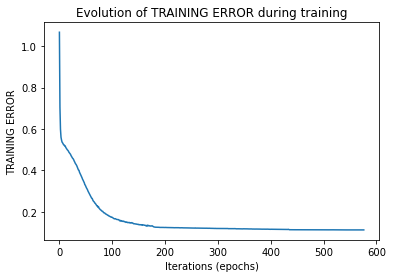

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(4210,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.05493958
Iteration 2, loss = 0.69791222
Iteration 3, loss = 0.59540499
Iteration 4, loss = 0.55920103
Iteration 5, loss = 0.54435112
Iteration 6, loss = 0.53544765
Iteration 7, loss = 0.53207166
Iteration 8, loss = 0.52773508
Iteration 9, loss = 0.52480546
Iteration 10, loss = 0.52015270
Iteration 11, loss = 0.51811339
Iteration 12, loss = 0.51428362
Iteration 13, loss = 0.51017584
Iteration 14, loss = 0.50538838
Iteration 15, loss = 0.50384398
Iteration 16, loss = 0.49923447
Iteration 17, loss = 0.49620687
Iteration 18, loss = 0.49164146
Iteration 19, loss = 0.49172577
Iteration 20, loss = 0.48577047
Iteration 21, loss = 0.47963086
Iteration 22, loss =

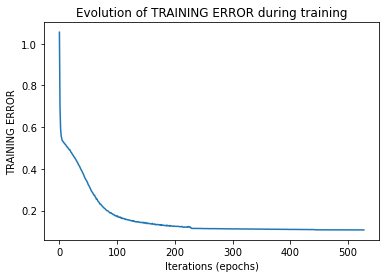

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(4310,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06923564
Iteration 2, loss = 0.70313985
Iteration 3, loss = 0.59575383
Iteration 4, loss = 0.55988588
Iteration 5, loss = 0.54621613
Iteration 6, loss = 0.53851551
Iteration 7, loss = 0.53162702
Iteration 8, loss = 0.52770238
Iteration 9, loss = 0.52533449
Iteration 10, loss = 0.51948574
Iteration 11, loss = 0.51876437
Iteration 12, loss = 0.51391226
Iteration 13, loss = 0.51294746
Iteration 14, loss = 0.50670002
Iteration 15, loss = 0.50401385
Iteration 16, loss = 0.50206346
Iteration 17, loss = 0.49764115
Iteration 18, loss = 0.49369430
Iteration 19, loss = 0.49010153
Iteration 20, loss = 0.48792942
Iteration 21, loss = 0.48121001
Iteration 22, loss =

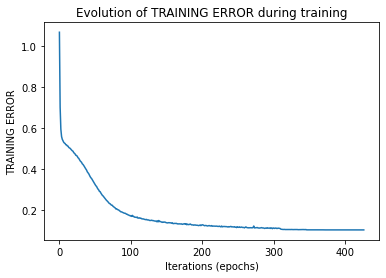

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(4410,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06629239
Iteration 2, loss = 0.70661766
Iteration 3, loss = 0.59932509
Iteration 4, loss = 0.56188382
Iteration 5, loss = 0.54532353
Iteration 6, loss = 0.53617192
Iteration 7, loss = 0.53200158
Iteration 8, loss = 0.52835583
Iteration 9, loss = 0.52352314
Iteration 10, loss = 0.52057693
Iteration 11, loss = 0.51931263
Iteration 12, loss = 0.51500737
Iteration 13, loss = 0.51098190
Iteration 14, loss = 0.50781453
Iteration 15, loss = 0.50446760
Iteration 16, loss = 0.50054907
Iteration 17, loss = 0.49729074
Iteration 18, loss = 0.49430151
Iteration 19, loss = 0.49114597
Iteration 20, loss = 0.48461187
Iteration 21, loss = 0.48190192
Iteration 22, loss =

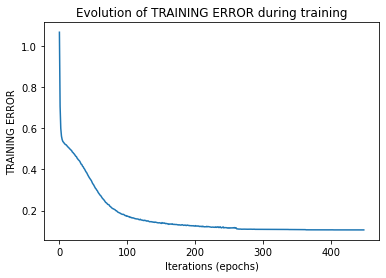

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(4510,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.06034464
Iteration 2, loss = 0.70090313
Iteration 3, loss = 0.59446143
Iteration 4, loss = 0.55997798
Iteration 5, loss = 0.54503748
Iteration 6, loss = 0.53640679
Iteration 7, loss = 0.53109072
Iteration 8, loss = 0.52854854
Iteration 9, loss = 0.52286578
Iteration 10, loss = 0.52051486
Iteration 11, loss = 0.51611392
Iteration 12, loss = 0.51495303
Iteration 13, loss = 0.51085077
Iteration 14, loss = 0.50886655
Iteration 15, loss = 0.50280423
Iteration 16, loss = 0.49948296
Iteration 17, loss = 0.49626433
Iteration 18, loss = 0.48952594
Iteration 19, loss = 0.48743206
Iteration 20, loss = 0.48511837
Iteration 21, loss = 0.47990056
Iteration 22, loss =

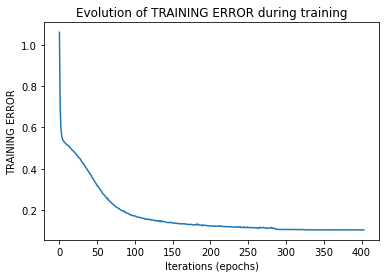

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(4610,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.05694531
Iteration 2, loss = 0.69960990
Iteration 3, loss = 0.59222726
Iteration 4, loss = 0.55870878
Iteration 5, loss = 0.54414426
Iteration 6, loss = 0.53637832
Iteration 7, loss = 0.53230369
Iteration 8, loss = 0.52678467
Iteration 9, loss = 0.52559054
Iteration 10, loss = 0.52115125
Iteration 11, loss = 0.51554678
Iteration 12, loss = 0.51306341
Iteration 13, loss = 0.51033523
Iteration 14, loss = 0.50651676
Iteration 15, loss = 0.50441133
Iteration 16, loss = 0.50130447
Iteration 17, loss = 0.49513453
Iteration 18, loss = 0.49301163
Iteration 19, loss = 0.49069520
Iteration 20, loss = 0.48413262
Iteration 21, loss = 0.48121693
Iteration 22, loss =

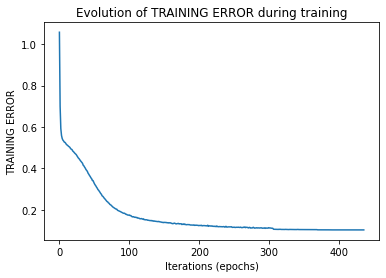

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(4710,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.07410625
Iteration 2, loss = 0.70395805
Iteration 3, loss = 0.59758509
Iteration 4, loss = 0.55976530
Iteration 5, loss = 0.54504851
Iteration 6, loss = 0.53937150
Iteration 7, loss = 0.53360235
Iteration 8, loss = 0.52850859
Iteration 9, loss = 0.52510147
Iteration 10, loss = 0.52102230
Iteration 11, loss = 0.51882293
Iteration 12, loss = 0.51502854
Iteration 13, loss = 0.51188889
Iteration 14, loss = 0.50854229
Iteration 15, loss = 0.50493375
Iteration 16, loss = 0.50213309
Iteration 17, loss = 0.49582591
Iteration 18, loss = 0.49402288
Iteration 19, loss = 0.49045950
Iteration 20, loss = 0.48662559
Iteration 21, loss = 0.48284540
Iteration 22, loss =

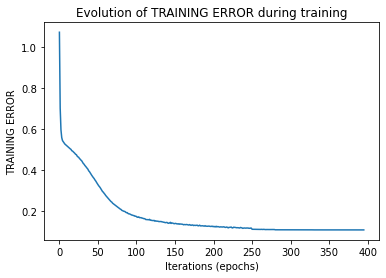

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(4810,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.05196715
Iteration 2, loss = 0.69228456
Iteration 3, loss = 0.59293746
Iteration 4, loss = 0.56092992
Iteration 5, loss = 0.54470857
Iteration 6, loss = 0.53920214
Iteration 7, loss = 0.53115275
Iteration 8, loss = 0.52570080
Iteration 9, loss = 0.52368940
Iteration 10, loss = 0.52144534
Iteration 11, loss = 0.51682130
Iteration 12, loss = 0.51468002
Iteration 13, loss = 0.51140490
Iteration 14, loss = 0.50696075
Iteration 15, loss = 0.50474806
Iteration 16, loss = 0.50108385
Iteration 17, loss = 0.49939383
Iteration 18, loss = 0.49357691
Iteration 19, loss = 0.49129549
Iteration 20, loss = 0.48679511
Iteration 21, loss = 0.48269696
Iteration 22, loss =

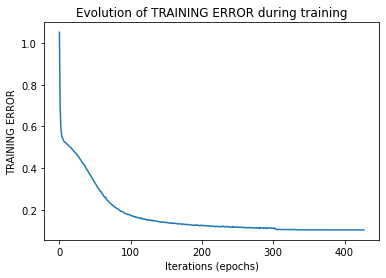

Acuracy (on test set) =  0.9603174603174603
MLPClassifier(alpha=1e-07, batch_size=4, hidden_layer_sizes=(4910,),
              learning_rate='adaptive', learning_rate_init=0.005, max_iter=2000,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)
Iteration 1, loss = 1.05167176
Iteration 2, loss = 0.69971341
Iteration 3, loss = 0.59283862
Iteration 4, loss = 0.56184103
Iteration 5, loss = 0.54339146
Iteration 6, loss = 0.53707128
Iteration 7, loss = 0.53138518
Iteration 8, loss = 0.52745208
Iteration 9, loss = 0.52581505
Iteration 10, loss = 0.51994422
Iteration 11, loss = 0.51715640
Iteration 12, loss = 0.51469526
Iteration 13, loss = 0.51302304
Iteration 14, loss = 0.50745028
Iteration 15, loss = 0.50566122
Iteration 16, loss = 0.50063067
Iteration 17, loss = 0.49563718
Iteration 18, loss = 0.49314909
Iteration 19, loss = 0.48970891
Iteration 20, loss = 0.48922423
Iteration 21, loss = 0.48084250
Iteration 22, loss =

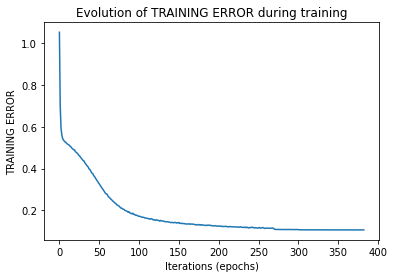

Acuracy (on test set) =  0.9603174603174603
{10: 0.9587301587301588, 110: 0.9619047619047619, 210: 0.9603174603174603, 310: 0.9619047619047619, 410: 0.9619047619047619, 510: 0.9603174603174603, 610: 0.9603174603174603, 710: 0.9603174603174603, 810: 0.9603174603174603, 910: 0.9603174603174603, 1010: 0.9603174603174603, 1110: 0.9603174603174603, 1210: 0.9619047619047619, 1310: 0.9603174603174603, 1410: 0.9603174603174603, 1510: 0.9603174603174603, 1610: 0.9603174603174603, 1710: 0.9619047619047619, 1810: 0.9619047619047619, 1910: 0.9603174603174603, 2010: 0.9619047619047619, 2110: 0.9603174603174603, 2210: 0.9603174603174603, 2310: 0.9603174603174603, 2410: 0.9603174603174603, 2510: 0.9603174603174603, 2610: 0.9603174603174603, 2710: 0.9603174603174603, 2810: 0.9603174603174603, 2910: 0.9603174603174603, 3010: 0.9603174603174603, 3110: 0.9603174603174603, 3210: 0.9619047619047619, 3310: 0.9603174603174603, 3410: 0.9603174603174603, 3510: 0.9619047619047619, 3610: 0.9603174603174603, 3710

In [3]:
#########################################################
# Create, fit and evaluate a MLP neural network classifier
#########################################################
from sklearn.neural_network import MLPClassifier

# Create the MLP (with specific values for hyper-parameters)

acuracy = {}
for k in np.arange(50)*100 + 10:
    mlp = MLPClassifier(hidden_layer_sizes=(k, ), activation='relu', solver='sgd', 
                        alpha=0.0000001, batch_size=4, learning_rate='adaptive', learning_rate_init=0.005, 
                        power_t=0.5, max_iter=2000, shuffle=True, random_state=11, tol=0.00001, 
                        verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                        early_stopping=False, validation_fraction=0.2, 
                        beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    print(mlp)
    # NB about syntax for hidden layers: hidden_layer_sizes=(H1, ) means ONE hidden layer containing H1 neurons,
    #   while hidden_layer_sizes=(H1,H2, ) would mean TWO hidden layers of respective sizes H1 and H2
    # NB about iteration: max_iter specifies a number of EPOCHS (= going through all training examples)

    # Train the MLP classifier on the training dataset
    mlp.fit(Xmoon_train, Ymoon_train_OneHot)
    #print()

    # Plot the LEARNING CURVE
    plt.title("Evolution of TRAINING ERROR during training")
    plt.xlabel("Iterations (epochs)")
    plt.ylabel("TRAINING ERROR")
    plt.plot(mlp.loss_curve_)
    plt.show()

    # Evaluate acuracy on TEST data
    score = mlp.score(Xmoon_test,Ymoon_test_OneHot)
    print("Acuracy (on test set) = ", score)
    acuracy[k] = score

print(acuracy)

In [118]:
max(acuracy)

4910

MLPClassifier(activation='relu', alpha=1e-07, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 10), learning_rate='constant',
              learning_rate_init=0.005, max_iter=500, momentum=0.8,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=11, shuffle=True, solver='adam', tol=1e-05,
              validation_fraction=0.2, verbose=True, warm_start=False)
Iteration 1, loss = 1.00537847
Iteration 2, loss = 0.59263418
Iteration 3, loss = 0.49155330
Iteration 4, loss = 0.41345650
Iteration 5, loss = 0.33433185
Iteration 6, loss = 0.25145204
Iteration 7, loss = 0.20310026
Iteration 8, loss = 0.20136658
Iteration 9, loss = 0.15809364
Iteration 10, loss = 0.13537820
Iteration 11, loss = 0.10689605
Iteration 12, loss = 0.11655610
Iteration 13, loss = 0.10443591
Iteration 14, loss = 0.09236458
Iteration 15, loss = 0.13810286
Iteration 16, loss = 0.08691264
Iteratio

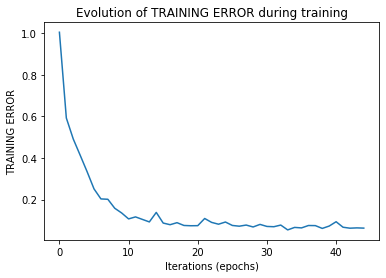

Acuracy (on test set) =  0.9619047619047619


In [40]:
#########################################################
# Create, fit and evaluate a MLP neural network classifier
#########################################################
from sklearn.neural_network import MLPClassifier

# Create the MLP (with specific values for hyper-parameters)

mlp = MLPClassifier(hidden_layer_sizes=(50, 10,), activation='relu', solver='adam', 
                    alpha=0.0000001, batch_size=4, learning_rate='constant', learning_rate_init=0.005, 
                    power_t=0.5, max_iter=500, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(mlp)
# NB about syntax for hidden layers: hidden_layer_sizes=(H1, ) means ONE hidden layer containing H1 neurons,
#   while hidden_layer_sizes=(H1,H2, ) would mean TWO hidden layers of respective sizes H1 and H2
# NB about iteration: max_iter specifies a number of EPOCHS (= going through all training examples)

# Train the MLP classifier on the training dataset
mlp.fit(Xmoon_train, Ymoon_train_OneHot)
#print()

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(mlp.loss_curve_)
plt.show()

# Evaluate acuracy on TEST data
score = mlp.score(Xmoon_test,Ymoon_test_OneHot)
print("Acuracy (on test set) = ", score)
              

## Below, we visualize the learnt boundary between classes in (2D) input space ##

**THIS SHOULD HELP YOU UNDERSTAND WHAT HAPPENS IF THERE ARE NOT ENOUGH HIDDEN NEURONS**

Optional: add code that visualises on the same plot the straight lines corresponding to each hidden neuron (you will need to dig into MLPClassifier documentation to find the 2 input weights and the bias of each hidden neuron). YOU SHOULD NOTICE THAT THE CLASSIFICATION BOUNDARY IS SOME INTERPOLATION BETWEEN THOSE STRAIGHT LINES.

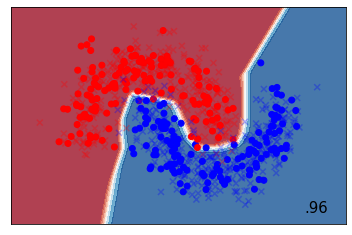

In [41]:
# Plot the decision boundary. For that, we will assign a color to each
#   point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Compute class probabilities for each mesh point
Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
# and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Axis ranges 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Print acuracy on plot
plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

# Actually plot
plt.ioff()
plt.show()


Now, **check, by changing MLPClassifier parameters above and then rerunning training+eval+plots, the impact of main learning hyper-parameters:**
- **number of neurons on hidden layer**: if very small, the classification boundary shall be too simple; if too large, overfitting might occur more easily. 
    **NB: generally, only ONE hidden layer is sufficient (cf. Cybenko theorem)**; *using more than one may require using ReLU as activation function, to avoid gradient "vanishing".*
- **activation functions**
- **number of iterations**: if too small, the training does not finish to converge; if too large, overfitting may occur. 
   **NB: it is therefore usually better to use "early_stopping" with quite large max_iter, so that the actual number of iterations shall adapt by STOPPING WHEN VALIDATION ERROR STOPS DECREASING**
- **solver** (the best choice is generally 'adam'; for more details, see https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py) 
- **learning_rate and momentum: the *initial learning rate* ALWAYS impacts training outcome a lot** (too small may stuck training in bad local minimum; too large can induce strong error fluctuations and possibly no convergence)
- **impact of L2 weight regularization term (alpha)**


### **Finally, use grid-search and cross-validation to find an optimized set of learning hyper-parameters (see code below).**

**Because the values of learning hyper-parameters can DRASTICALLY change the outcome of training, it is ESSENTIAL THAT YOU ALWAYS TRY TO FIND OPTIMIZED VALUES FOR THE ALGORITHM HYPER-PARAMETERS. And this ABSOLUTELY NEEDS TO BE DONE USING "VALIDATION", either with a validation set separate from the training set, or using cross-validation. CROSS-VALIDATION is the MOST ROBUST WAY OF FINDING OPTIMIZED HYPER-PARAMETRS VALUES, and the GridSearchCV function of SciKit-Learn makes this rather straightforward.**

**WARNING:** GridSearchCV launches many successive training sessions, so **can be rather long to execute if you compare too many combinations**

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

param_grid = [
  {'hidden_layer_sizes': [(5,), (10,), (20,), (40,)], 
   'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
   'alpha': [0.00001, 0.0001, 0.001]}
 ]
print(param_grid)

# Cross-validation grid-search (for finding best possible accuracy)
clf = GridSearchCV( MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
                                  beta_2=0.999, early_stopping=True, epsilon=1e-08,
                                  hidden_layer_sizes=(10,), learning_rate='constant',
                                  learning_rate_init=0.005, max_iter=500, momentum=0.8,
                                  nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
                                  solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
                                  warm_start=False), 
                   param_grid, cv=3, scoring='accuracy') 
# NOTE THAT YOU CAN USE OTHER VALUE FOR cv (# of folds) and OTHER SCORING CRITERIA OTHER THAN 'accuracy'
    
clf.fit(Xmoon_train, Ymoon_train_OneHot)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = Ymoon_test_OneHot, clf.predict(Xmoon_test)
print(classification_report(y_true, y_pred))
print()

[{'hidden_layer_sizes': [(5,), (10,), (20,), (40,)], 'learning_rate_init': [0.003, 0.01, 0.03, 0.1], 'alpha': [1e-05, 0.0001, 0.001]}]
Best parameters set found on development set:

{'alpha': 0.001, 'hidden_layer_sizes': (40,), 'learning_rate_init': 0.1}

Grid scores on development set:

0.833 (+/-0.018) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.003}
0.852 (+/-0.046) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.01}
0.878 (+/-0.094) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.03}
0.952 (+/-0.038) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.1}
0.830 (+/-0.058) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.003}
0.889 (+/-0.065) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01}
0.900 (+/-0.031) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.03}
0.937 (+/-0.064) for {'alpha': 1e-05, 'hidden_lay

## 2. WORK ON A REALISTIC DATASET:  A SIMPLIFIED HANDWRITTEN DIGITS DATASET

**Please FIRST READ the [*Digits DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py).**
In this classification problem, there are 10 classes, with a total of 1797 examples (each one being a 64D vector corresponding to an 8x8 pixmap). 

**Assignment #1: find out what learning hyper-parameters should be modified in order to obtain a satisfying MLP digits classifier**

**Assignment #2: modify the code below to use cross-validation and find best training hyper-parameters and MLP classifier you can for this handwritten digits classification task.**

**Assignment #3: compute and plot the precision-recall curve (for each class).** NB: search into sciKit-learn documentation to find the function for that, and then add a code cell that uses it.

**Assignment #4: display the confusion matrix as a prettier and more easily understable plot (cf. example on https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)**

**Assignment #5 (optional): plot the first layer of weights as images (see explanations and example code at http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)**


Number_of-examples =  1797

 Plot of first example
CLOSE PLOT WINDOW TO CONTINUE


<Figure size 432x288 with 0 Axes>

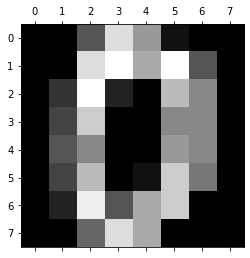

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.01, max_iter=9, momentum=0.8,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=11, shuffle=True, solver='sgd', tol=1e-05,
              validation_fraction=0.1, verbose=True, warm_start=False)
Iteration 1, loss = 0.84598640
Iteration 2, loss = 0.42266720
Iteration 3, loss = 0.32807737
Iteration 4, loss = 0.28872864
Iteration 5, loss = 0.30061037
Iteration 6, loss = 0.25480669
Iteration 7, loss = 0.24196842
Iteration 8, loss = 0.28037790
Iteration 9, loss = 0.19353264


C:\Users\rpatureau\Documents\Winpython\python-3.7.4.amd64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


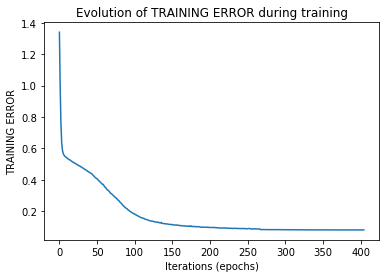

Acuracy (on test set) =  0.9377085650723026
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        92
           1       0.90      0.85      0.87        97
           2       0.97      0.99      0.98        86
           3       0.99      0.86      0.92        97
           4       0.99      0.96      0.97        95
           5       0.97      0.98      0.97        85
           6       0.99      0.98      0.98        83
           7       0.98      0.95      0.96        94
           8       0.74      0.98      0.84        88
           9       0.95      0.88      0.91        82

    accuracy                           0.94       899
   macro avg       0.94      0.94      0.94       899
weighted avg       0.95      0.94      0.94       899

CONFUSION MATRIX below


array([[91,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 82,  1,  0,  0,  1,  0,  0, 12,  1],
       [ 0,  1, 85,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 83,  0,  1,  0,  0, 10,  1],
       [ 1,  1,  0,  0, 91,  0,  1,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 83,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 81,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 89,  3,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 86,  1],
       [ 0,  3,  0,  1,  0,  1,  0,  2,  3, 72]], dtype=int64)

In [97]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray() 
plt.matshow(digits.images[0]) 
print("CLOSE PLOT WINDOW TO CONTINUE")
plt.ioff()
plt.show()

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

Xdigits = data
y_digits = digits.target
Xdigits_train, Xdigits_test, y_digits_train, y_digits_test = train_test_split(Xdigits, y_digits, test_size=0.5)

clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='tanh', solver='sgd', 
                    alpha=0.00001, batch_size=4, learning_rate='constant', learning_rate_init=0.01, 
                    power_t=0.5, max_iter=9, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

# Train the MLP classifier on training dataset
clf.fit(Xdigits_train, y_digits_train)

# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(mlp.loss_curve_)
plt.show()

# Evaluate acuracy on test data
score = clf.score(Xdigits_test,y_digits_test)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_digits_test, clf.predict(Xdigits_test)
print(classification_report(y_true, y_pred))

# Display CONFUSION MATRIX on TEST set
from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX below")
confusion_matrix(y_true, y_pred)   
